In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

test.shape

test.dtypes

## Нет Object

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Id                            int64
dtype: object

In [3]:
test.isna().sum() ## Нет пропусков

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Id                          0
dtype: int64

<ipython-input-4-81db3fb5c8f5>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(train_corr, mask=np.zeros_like(train_corr, dtype = np.bool), cmap = 'BrBG', ax=ax)


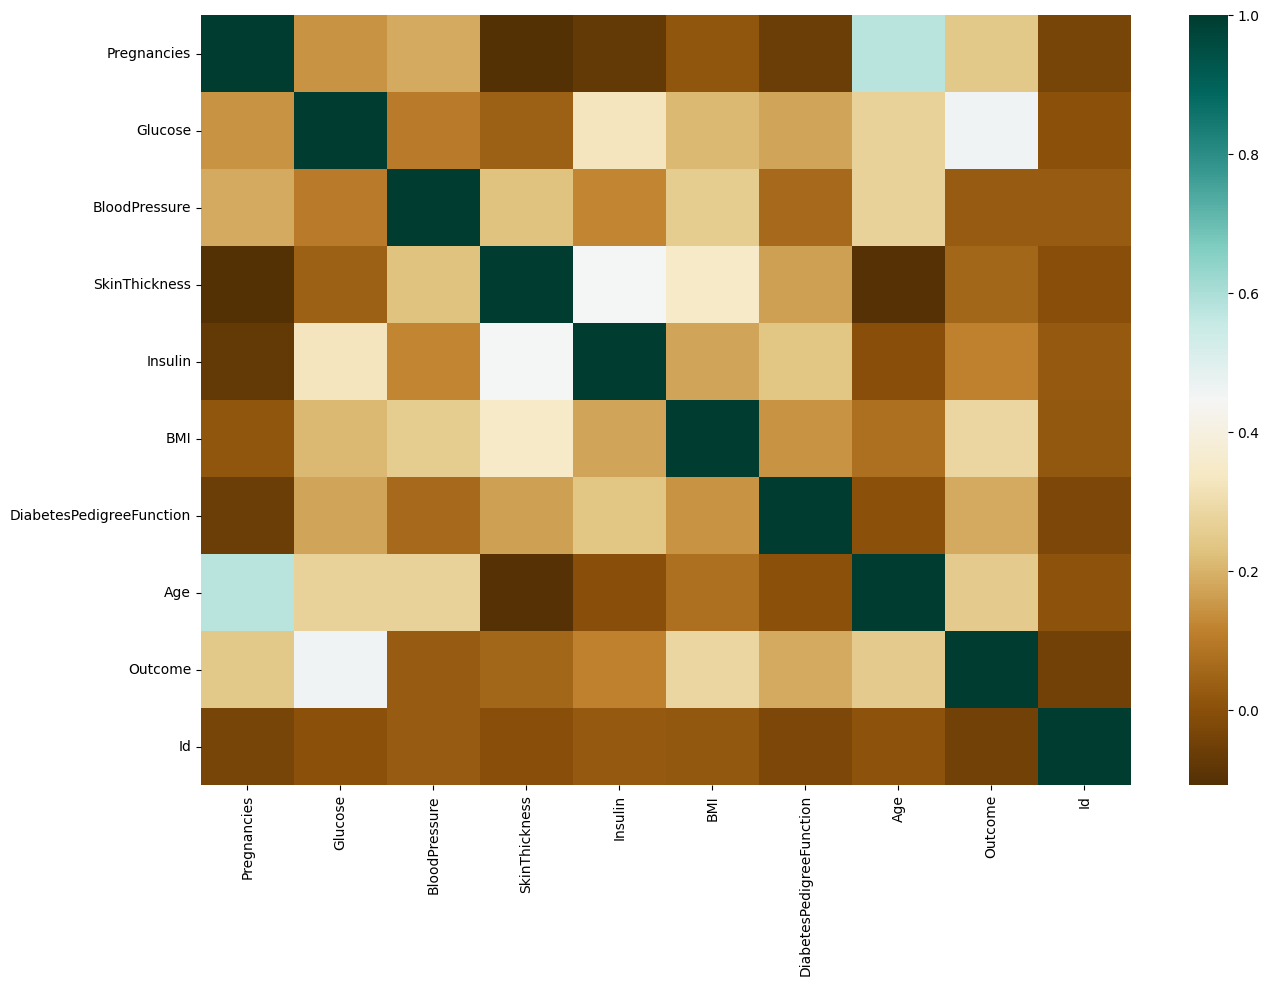

In [4]:
train_corr = train.corr()

f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(train_corr, mask=np.zeros_like(train_corr, dtype = np.bool), cmap = 'BrBG', ax=ax)
plt.show()

<ipython-input-5-cb94037e0e40>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(test_corr, mask=np.zeros_like(test_corr, dtype = np.bool), cmap = 'BrBG', ax=ax)


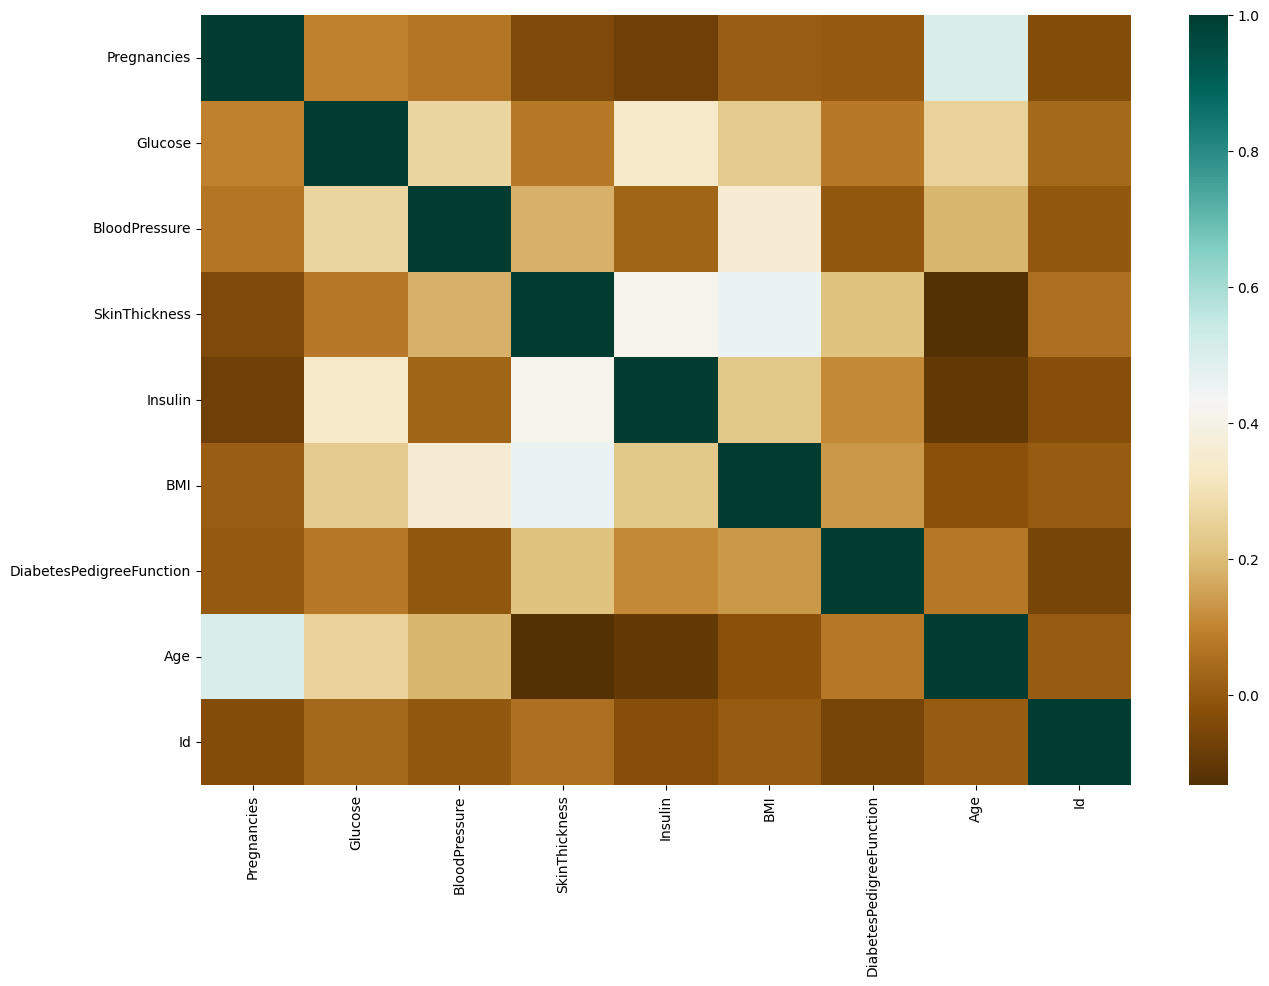

In [5]:
test_corr = test.corr()

f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(test_corr, mask=np.zeros_like(test_corr, dtype = np.bool), cmap = 'BrBG', ax=ax)
plt.show()

In [6]:
train['Outcome'].value_counts()

0    290
1    176
Name: Outcome, dtype: int64

In [7]:
X = train.drop(columns=['Outcome'])
y = train['Outcome']

y.value_counts()

0    290
1    176
Name: Outcome, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

df1 = StandardScaler().fit_transform(train)

train = pd.DataFrame(df1, index=train.index, columns=train.columns)
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,0.580194,0.797697,0.174659,0.863338,-0.720173,0.141348,0.475030,1.468113,1.283638,-1.694534
1,1.169878,1.875522,-0.207234,-1.286768,-0.720173,-1.187892,0.614855,-0.105428,1.283638,-1.685545
2,-0.894017,-1.019209,-0.111761,0.126159,0.102185,-0.568440,-0.954288,-1.067036,-0.779036,-1.681051
3,1.759562,-0.218539,-3.262380,-1.286768,-0.720173,0.360738,-1.056826,-0.367685,-0.779036,-1.663073
4,-0.599175,2.306652,0.079185,1.477654,4.030256,-0.258714,-0.982253,1.730370,1.283638,-1.658579
...,...,...,...,...,...,...,...,...,...,...
461,-0.599175,-1.050004,-0.493654,0.310454,-0.580198,-0.529724,0.906933,-0.979617,-0.779036,1.721231
462,1.464720,1.475187,0.270132,0.617612,-0.720173,1.483494,-0.220986,0.856180,1.283638,1.725725
463,1.464720,-1.019209,-0.302708,-1.286768,-0.720173,-1.291134,-1.031968,-0.018009,-0.779036,1.730220
464,1.759562,-0.649669,0.365605,1.661949,0.854555,0.051012,-0.941859,2.604559,-0.779036,1.734714


In [9]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 123, k_neighbors = 10)

column = X.columns

X_os, y_os = os.fit_resample(X, y)
X_os = pd.DataFrame(data = X_os, columns = column)
y_os = pd.DataFrame(data = y_os, columns = ['Outcome'])

print(X_os.shape, y_os.shape)
y_os.value_counts()

(580, 9) (580, 1)


Outcome
0          290
1          290
dtype: int64

In [10]:
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Id
0,1,85,66,29,0,26.6,0.351,31,1
1,0,137,40,35,168,43.1,2.288,33,4
2,5,116,74,0,0,25.6,0.201,30,5
3,3,78,50,32,88,31.0,0.248,26,6
4,8,125,96,0,0,0.0,0.232,54,9
...,...,...,...,...,...,...,...,...,...
297,1,106,76,0,0,37.5,0.197,26,758
298,6,190,92,0,0,35.5,0.278,66,759
299,2,122,70,27,0,36.8,0.340,27,764
300,5,121,72,23,112,26.2,0.245,30,765


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

principalComponents = pca.fit_transform(train)
train = pd.DataFrame(data = principalComponents)

In [12]:
pca = PCA(.70)
principalComponents = pca.fit_transform(train)
train = pd.DataFrame(data = principalComponents)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5, min_samples_split=2, n_estimators=30, min_samples_leaf = 2,  random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(accuracy_score(y_pred, y_test))
print(recall_score(y_pred, y_test))
print(precision_score(y_pred, y_test))

0.7285714285714285
0.9142857142857143
0.47761194029850745


In [16]:
pred_test = model.predict(test)

Id = test['Id']

y_pred_test1 = pd.DataFrame(data = Id, columns=['Id'])

y_pred_test2 = pd.DataFrame(data = pred_test, columns=['Outcome'])

y_pred_test = pd.concat([
    y_pred_test1,
    y_pred_test2
], axis=1)

y_pred_test.to_csv('solution.csv', index = False)